In [101]:
# Plot using UpsetR

In [102]:
install.packages("UpSetR")

Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [129]:
library("UpSetR")
library("repr")
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [139]:
options(repr.plot.width=15, repr.plot.height=10)

In [131]:
df=read.csv('/home/jovyan/data/combined_tidied_disease_gene_with_phenotype_annotation.csv')
head(df,3)

,X,TF,source,phenotype_Heterotaxy,phenotype_ASD,phenotype_VSD,phenotype_AVSD,phenotype_Malformation.of.outflow.tracts,phenotype_Functional.single.ventricle,phenotype_Cardiomyopathy,⋯,phenotype_HCM,phenotype_LVNC,phenotype_Venous.anomaly,phenotype_Pulmonary.artery,phenotype_Aortic.arch,phenotype_Aorta,phenotype_Coronary.anomaly,phenotype_VA.valves,phenotype_AV.valves,phenotype
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,ABL1,1,CHDgene,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,"Atrial septal defect,Ventricular septal defect"
2,ACTC1,0,CHDgene,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,"Atrial septal defect,Ventricular septal defect"
3,ACVR1,0,CHDgene,0,1,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,"Atrial septal defect,Atrioventricular septal defect,Transposition of the great arteries,Double outlet right ventricle"


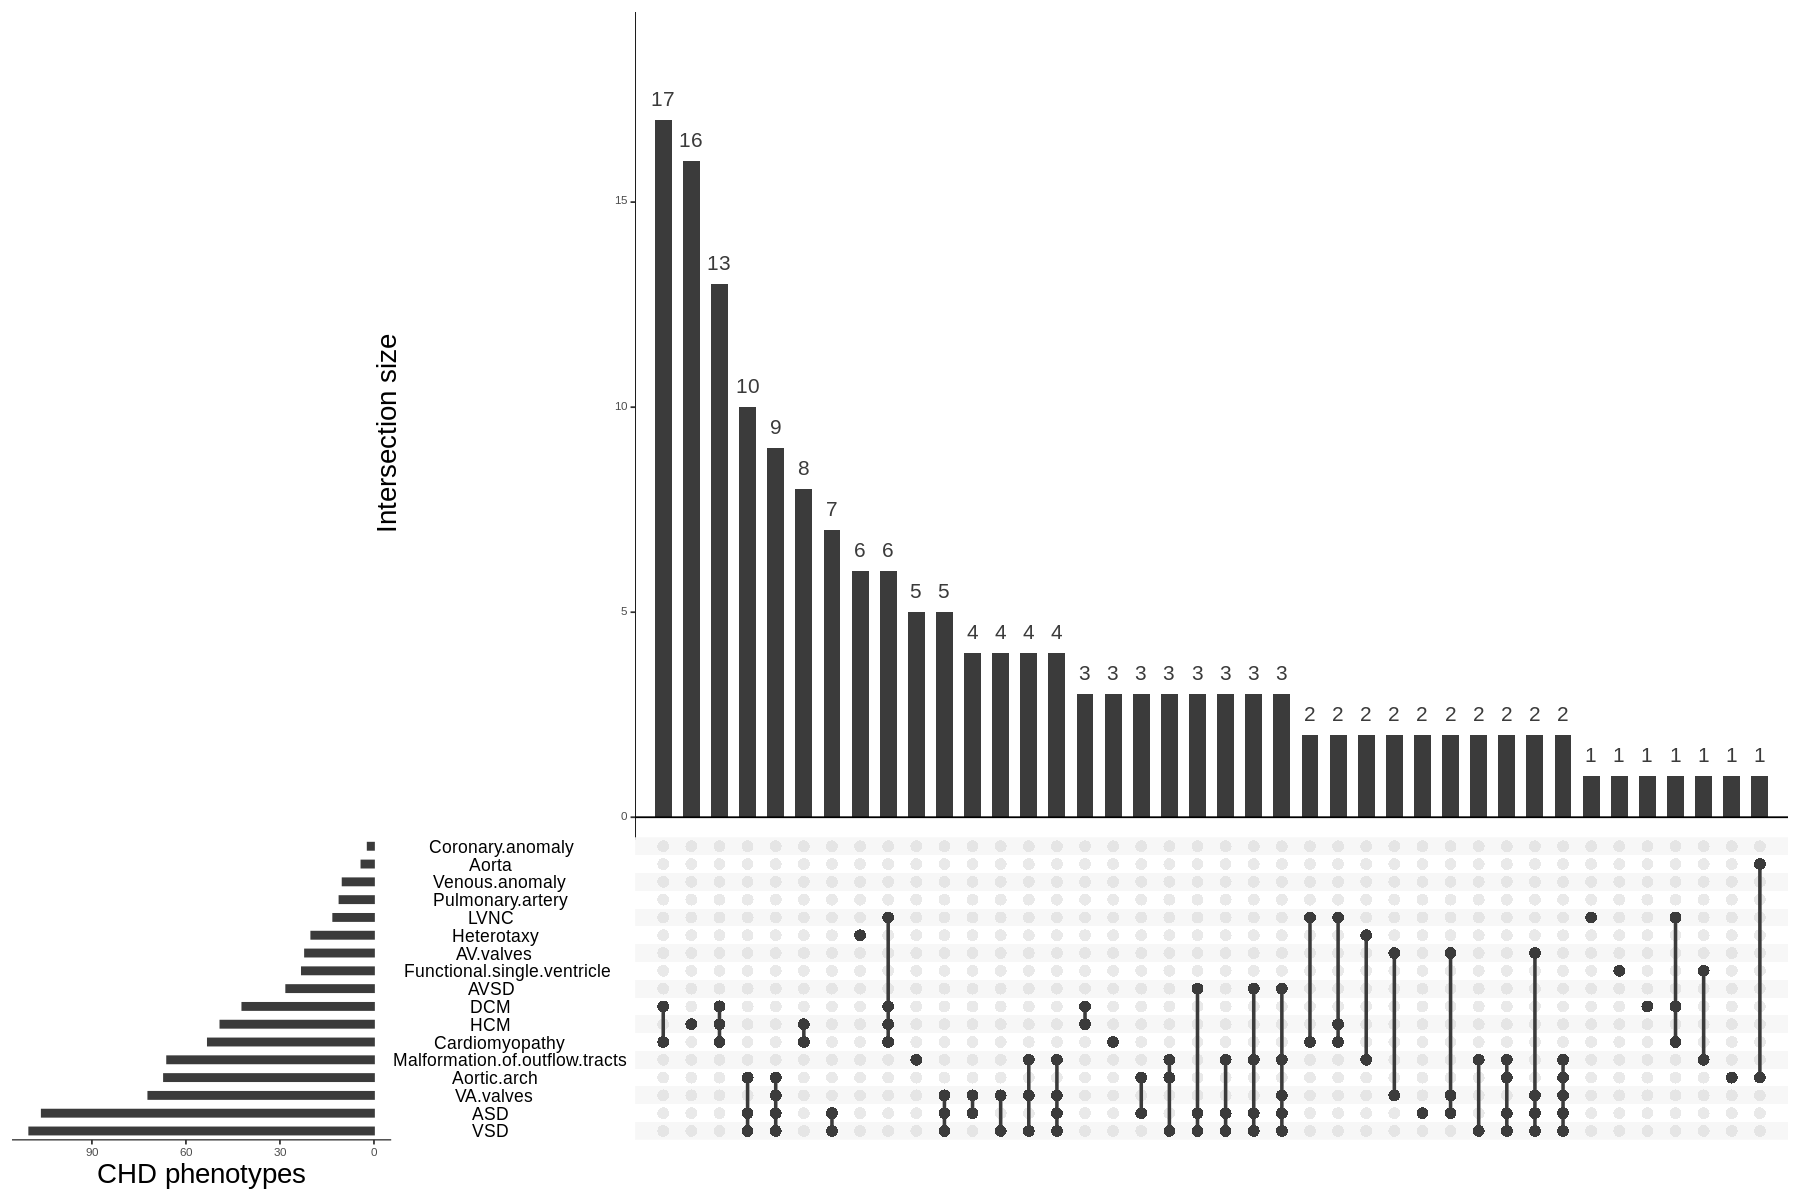

In [178]:
cols<-colnames(df)
phen_cols<-grep("phenotype_", cols, value = TRUE)

tmp<-df%>%filter(source!='ClinVar')%>%select(all_of(phen_cols))

names(tmp)<-substring(names(tmp), 11)

tmp<-tmp%>% select_if(colSums(.) != 0)

sets=colnames(tmp)

upset(tmp,
     sets=sets,
     order.by='freq', 
    text.scale = c(2, 1, 2,1, 1.5, 2),
     mainbar.y.label = "Intersection size",
     sets.x.label = "CHD phenotypes",
  point.size = 3,
      line.size = 1)